## Fashion MNIST CNN simple example

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/fasshionm.png" width=1000>


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPooling2D

from tensorflow.keras.datasets import fashion_mnist

The Fashion MNIST datasets has 70,000 28x28 grayscale images. The class labels are :


---


Label	Description

0 T-shirt/top


1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

4422102/4422102 [==============================] - 0s 0us/step


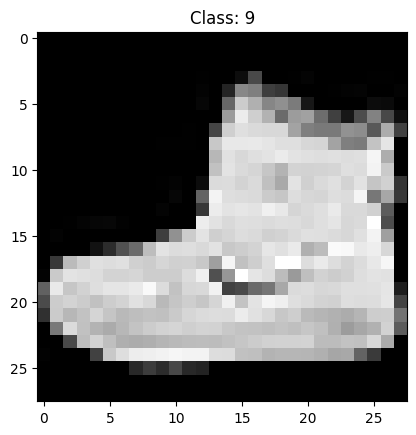

<Figure size 640x480 with 0 Axes>

In [ ]:
# Loading Dataset 60000 train, 10000 test

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[0],cmap='gray')
plt.title('Class: {}'.format(y_train[0]));
plt.figure();

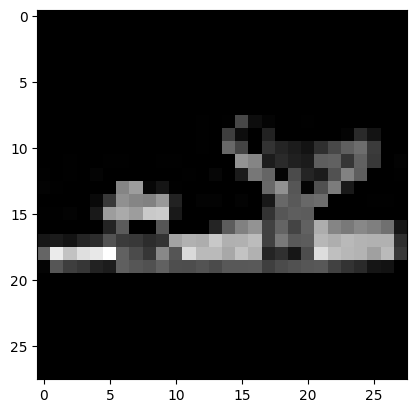

In [ ]:
plt.imshow(X_train[59999],cmap='gray') # matrix 28x28

In [ ]:
y_train.shape

(60000,)

In [ ]:
len(y_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

<Figure size 640x480 with 0 Axes>

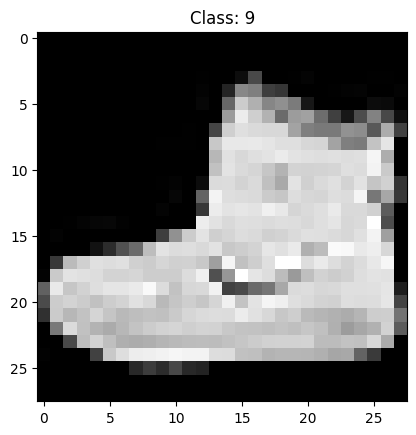

<Figure size 640x480 with 0 Axes>

In [ ]:
X_test0 = X_test.copy() #for plotting images in the end

# Normalizing the Data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
plt.imshow(X_train[0],cmap='gray')
plt.title('Class: {}'.format(y_train[0]))
plt.figure()

In [ ]:
# add empty color dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.shape #TENSORFLOW!! (batch,L,H,CH)

(60000, 28, 28, 1)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
nclasses = np.unique(y_train).size
nclasses

10

In [ ]:
#sparse_categorical_crossentropy
# with this loss i don't need to OneHorEnc the Target

In [ ]:
model = Sequential()

## CONVOLUTION
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Neural Dense Connection
model.add(Dense(128, activation='relu'))
model.add(Dense(nclasses, activation='softmax')) # nclasses = 10

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Fitting the Model
history = model.fit(X_train,y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2
                    )

Epoch 1/10


750/750 - 25s - loss: 1.0428 - accuracy: 0.6180 - val_loss: 0.7498 - val_accuracy: 0.7076 - 25s/epoch - 34ms/step
Epoch 2/10
750/750 - 22s - loss: 0.7015 - accuracy: 0.7354 - val_loss: 0.6616 - val_accuracy: 0.7515 - 22s/epoch - 29ms/step
Epoch 3/10
750/750 - 21s - loss: 0.6323 - accuracy: 0.7616 - val_loss: 0.5899 - val_accuracy: 0.7752 - 21s/epoch - 28ms/step
Epoch 4/10
750/750 - 24s - loss: 0.5789 - accuracy: 0.7814 - val_loss: 0.5601 - val_accuracy: 0.7924 - 24s/epoch - 31ms/step
Epoch 5/10
750/750 - 24s - loss: 0.5391 - accuracy: 0.7987 - val_loss: 0.5304 - val_accuracy: 0.7974 - 24s/epoch - 32ms/step
Epoch 6/10
750/750 - 23s - loss: 0.5052 - accuracy: 0.8112 - val_loss: 0.4824 - val_accuracy: 0.8223 - 23s/epoch - 31ms/step
Epoch 7/10
750/750 - 23s - loss: 0.4808 - accuracy: 0.8196 - val_loss: 0.4804 - val_accuracy: 0.8210 - 23s/epoch - 31ms/step
Epoch 8/10
750/750 - 22s - loss: 0.4595 - accuracy: 0.8302 - val_loss: 0.4508 - val_accuracy: 0.8359 - 22s/epoch - 29ms/step
Epoch 9/10


In [ ]:
history.history

{'loss': [0.41348686814308167,
  0.32533058524131775,
  0.28323981165885925,
  0.25256165862083435,
  0.22624440491199493,
  0.20819765329360962,
  0.18597641587257385,
  0.16979965567588806,
  0.15255284309387207,
  0.13775363564491272],
 'accuracy': [0.851645827293396,
  0.8813958168029785,
  0.8958958387374878,
  0.9086874723434448,
  0.9167291522026062,
  0.9226041436195374,
  0.9307916760444641,
  0.937333345413208,
  0.9436041712760925,
  0.9496041536331177],
 'val_loss': [0.36488476395606995,
  0.315309077501297,
  0.28359249234199524,
  0.2822597622871399,
  0.3183830976486206,
  0.25686052441596985,
  0.25641441345214844,
  0.25105294585227966,
  0.25912895798683167,
  0.2662738561630249],
 'val_accuracy': [0.8684999942779541,
  0.8860833048820496,
  0.8971666693687439,
  0.8979166746139526,
  0.8820833563804626,
  0.9072499871253967,
  0.9073333144187927,
  0.9109166860580444,
  0.9138333201408386,
  0.909166693687439]}

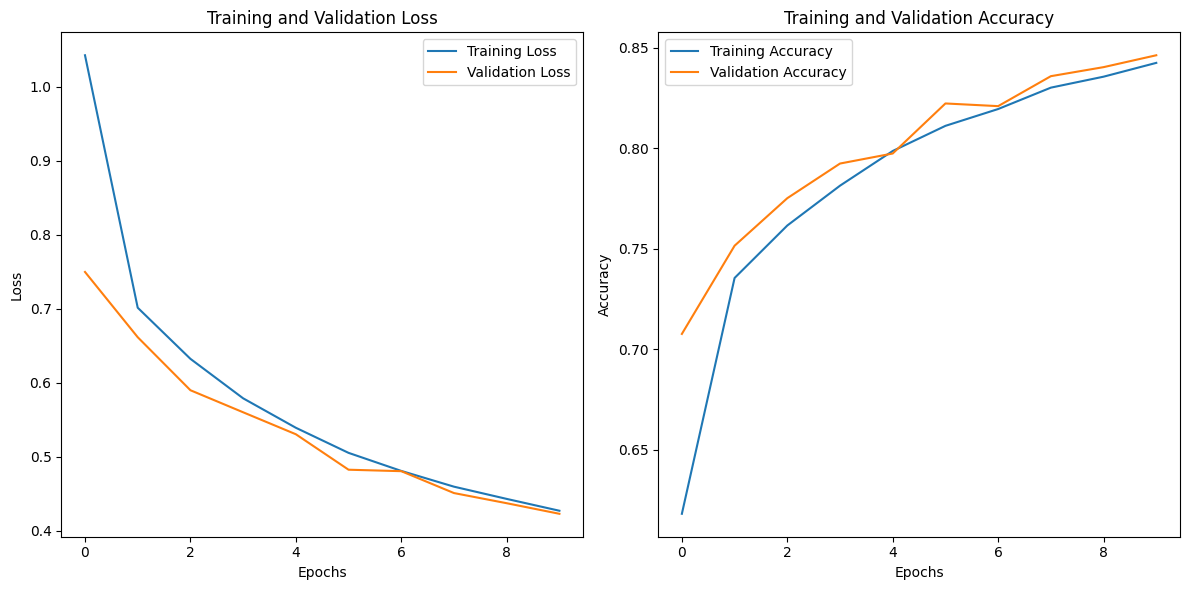

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluating on the Test Data
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.4481 - accuracy: 0.8394


[0.448070228099823, 0.8393999934196472]

In [ ]:
# Predict the first 10 images, Probability Distribution
y_pred = model.predict(X_test[:10])
y_pred

1/1 [==============================] - 0s 138ms/step


array([[3.66428488e-08, 9.48330747e-10, 9.60539865e-07, 1.06970496e-07,
        1.35480320e-06, 1.04496283e-02, 8.92911487e-08, 7.48756304e-02,
        9.59172903e-04, 9.13712978e-01],
       [4.04249132e-03, 4.55362851e-07, 9.29627180e-01, 3.52234230e-04,
        3.73670808e-03, 9.21646848e-09, 6.13696128e-02, 2.27989150e-13,
        8.71350872e-04, 7.70643727e-09],
       [1.19044344e-05, 9.99814689e-01, 6.11681003e-07, 1.51554879e-04,
        1.85331828e-05, 2.06327712e-07, 8.17354305e-07, 5.29267616e-08,
        1.60657157e-06, 2.20309646e-10],
       [4.78776030e-07, 9.99114811e-01, 1.61956933e-07, 8.77624261e-04,
        6.71008320e-06, 1.50712101e-08, 1.17061425e-07, 5.62834117e-08,
        1.57387667e-08, 6.24583896e-09],
       [3.11233792e-02, 5.45098097e-04, 1.30044386e-01, 4.29994799e-03,
        3.46958786e-02, 4.25361077e-06, 7.92646587e-01, 1.07122027e-07,
        6.62968494e-03, 1.06816206e-05],
       [2.45794392e-04, 9.98496175e-01, 4.20044125e-05, 5.99883439e-04,
   

In [ ]:
res = np.argmax(y_pred, axis=1)
print(res)
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


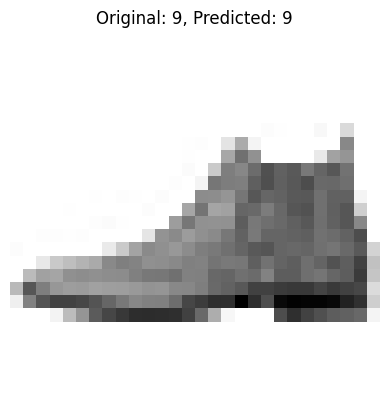

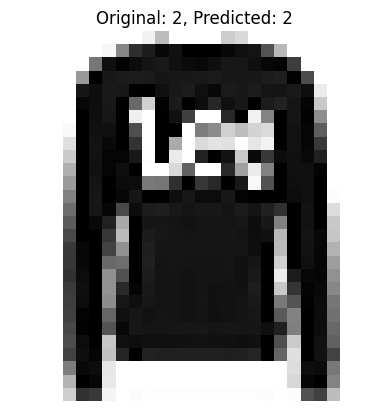

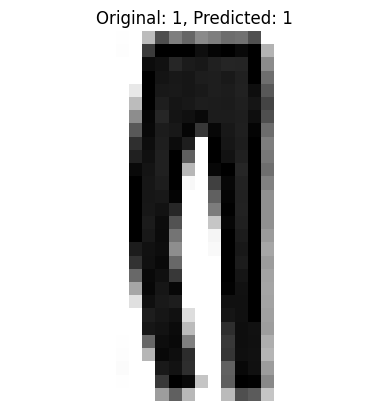

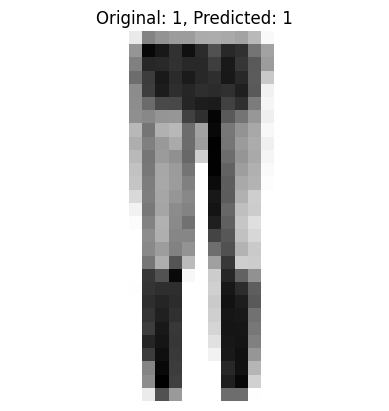

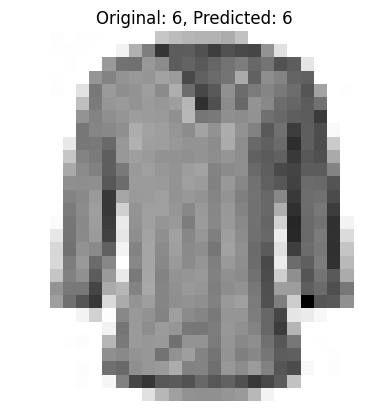

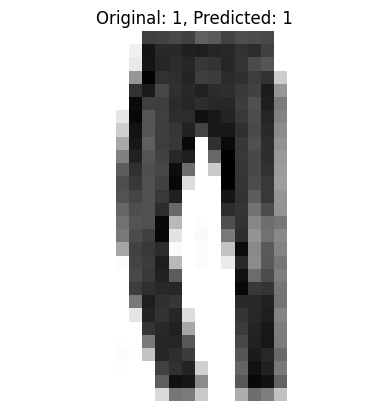

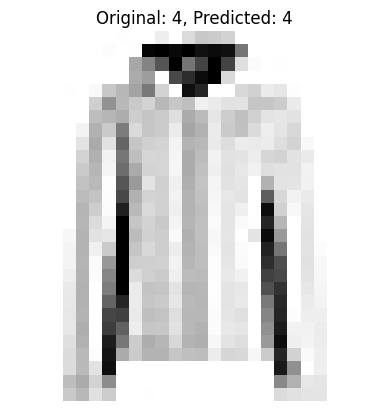

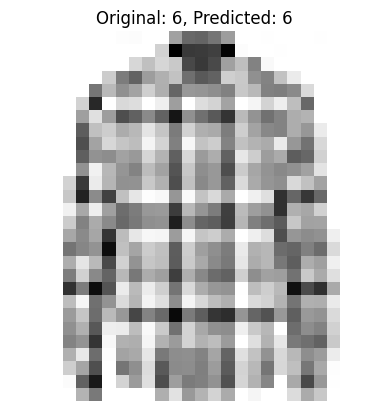

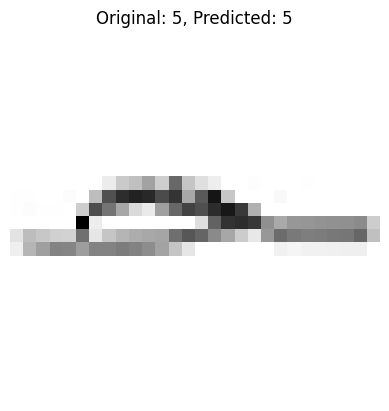

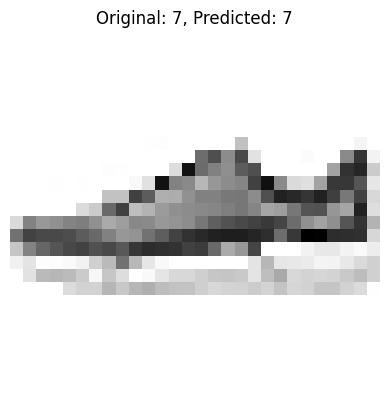

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualizing the result
# Visualizing the result
for i in range(10):
    plt.imshow(X_test0[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(y_test[i], res[i]))
    plt.axis("Off")
    plt.figure()